In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ngram import NGram
from IPython.display import display

In [3]:
trainf = pd.read_csv('./data/train_logs.csv')
testf = pd.read_csv('./data/train_scores.csv')

In [4]:
trainf['id'] = trainf['id'].astype(str)
testf['id'] = testf['id'].astype(str)

In [5]:
display(trainf.head())
display(trainf.describe(include='all'))
display(trainf.activity.unique())
display(trainf.text_change.unique())

,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
0,001519c8,1,4526,4557,31,Nonproduction,Leftclick,Leftclick,NoChange,0,0
1,001519c8,2,4558,4962,404,Nonproduction,Leftclick,Leftclick,NoChange,0,0
2,001519c8,3,106571,106571,0,Nonproduction,Shift,Shift,NoChange,0,0
3,001519c8,4,106686,106777,91,Input,q,q,q,1,1
4,001519c8,5,107196,107323,127,Input,q,q,q,2,1


,id,event_id,down_time,up_time,action_time,activity,down_event,up_event,text_change,cursor_position,word_count
count,8405898,8.405898e+06,8.405898e+06,8.405898e+06,8.405898e+06,8405898,8405898,8405898,8405898,8.405898e+06,8.405898e+06
unique,2471,NaN,NaN,NaN,NaN,50,131,130,4111,NaN,NaN
top,d3fef198,NaN,NaN,NaN,NaN,Input,q,q,q,NaN,NaN
freq,12876,NaN,NaN,NaN,NaN,6726796,5365319,5364789,6128208,NaN,NaN
mean,NaN,2.067649e+03,7.935603e+05,7.936584e+05,9.808498e+01,NaN,NaN,NaN,NaN,1.222964e+03,2.314687e+02
std,NaN,1.588284e+03,5.149451e+05,5.149428e+05,2.533985e+02,NaN,NaN,NaN,NaN,9.485242e+02,1.759088e+02
min,NaN,1.000000e+00,1.060000e+02,2.520000e+02,0.000000e+00,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00
25%,NaN,8.520000e+02,3.731842e+05,3.732820e+05,6.600000e+01,NaN,NaN,NaN,NaN,4.990000e+02,9.600000e+01
50%,NaN,1.726000e+03,7.208860e+05,7.209800e+05,9.300000e+01,NaN,NaN,NaN,NaN,1.043000e+03,2.000000e+02
75%,NaN,2.926000e+03,1.163042e+06,1.163141e+06,1.220000e+02,NaN,NaN,NaN,NaN,1.706000e+03,3.270000e+02


array(['Nonproduction', 'Input', 'Remove/Cut', 'Replace',
       'Move From [284, 292] To [282, 290]',
       'Move From [287, 289] To [285, 287]',
       'Move From [460, 461] To [465, 466]', 'Paste',
       'Move From [905, 1314] To [907, 1316]',
       'Move From [565, 743] To [669, 847]',
       'Move From [669, 847] To [565, 743]',
       'Move From [1041, 1121] To [1496, 1576]',
       'Move From [1455, 1557] To [1323, 1425]',
       'Move From [2268, 2275] To [2247, 2254]',
       'Move From [213, 302] To [902, 991]',
       'Move From [0, 158] To [234, 392]',
       'Move From [460, 465] To [925, 930]',
       'Move From [810, 906] To [816, 912]',
       'Move From [186, 187] To [184, 185]',
       'Move From [140, 272] To [299, 431]',
       'Move From [114, 140] To [272, 298]',
       'Move From [1386, 1450] To [1445, 1509]',
       'Move From [442, 524] To [296, 378]',
       'Move From [408, 414] To [390, 396]',
       'Move From [1144, 1147] To [1142, 1145]',
       'Move 

array(['NoChange', 'q', ' ', ..., 'qq qqq qqqq qqqqq',
       'qq qqqqq qqqq qq qqqqq ',
       '\n qqqqq qqqqqq qqqqqqqqqq qq q qqqqqqqq qqq qqq qqqq qqqqqq q qqq. \n\nqqqq qqq qq qqqqqqq qqq:\n- \n- qqq qqqqqqq qqqq q qqqqqq qqqqqqqq qq qqqq qqqqqqqq '],
      dtype=object)

In [6]:
import re
pattern = re.compile(r'\[(\d+), (\d+)\]')
moves = [a for a in trainf.activity.unique() if 'Move' in a]
new_moves = []

for element in moves:
    move = [tuple(map(int, m.groups())) for m in pattern.finditer(element)]
    new_moves.append(move)

trainf.loc[:, 'move_activity'] = trainf.activity.apply(lambda x: 'Move' in x)

In [8]:
gram = NGram()
for val in trainf.down_event.values:
    gram.add(val)
groups = {}
for val in trainf.down_event.values:
    skip = False
    aux = gram.search(val, threshold=0.2)
    for a, s in aux:
        if a in groups:
            skip = True
            break
    if not skip:
        groups[val] = [a for a,_ in aux]
for key, values in groups.items():
    if len(values) > 1:
        print(key, values)

Leftclick ['Leftclick', 'Rightclick', 'Middleclick', 'Unknownclick']
Space ['Space', 'Backspace']
Enter ['Enter', 'End']
ArrowLeft ['ArrowLeft', 'ArrowRight', 'ArrowUp', 'ArrowDown']
CapsLock ['CapsLock', 'NumLock', 'ScrollLock']
Control ['Control', 'ContextMenu']
AudioVolumeMute ['AudioVolumeMute', 'AudioVolumeUp', 'AudioVolumeDown']
MediaPlayPause ['MediaPlayPause', 'Pause']
Alt ['Alt', 'AltGraph']
PageDown ['PageDown', 'PageUp', 'ArrowDown', 'AudioVolumeDown']
F12 ['F12', 'F2', 'F1', 'F11', 'F10', 'F15']
MediaTrackPrevious ['MediaTrackPrevious', 'MediaTrackNext']


In [9]:
trainf[trainf.activity=='Input'].down_event.unique()
real_text = ['q', 'Space' ,'Enter', ',', "'", '.', ';','-', '?', '"', '[', '(', ')', '!', '¿',]

In [ ]:
datas = []
for id in trainf.id.unique():
    cursor_position = trainf[trainf.id==id].cursor_position.values
    back_track = []
    for indx in range(len(cursor_position)-1):
        if cursor_position[indx+1] < cursor_position[indx]:
            back_track.append(cursor_position[indx]- cursor_position[indx+1])
    data = {
        'id': id,
        'amount_back_track' : len(back_track),
        'mean_back_track': sum(back_track)/len(back_track),
        'max_back_track': max(back_track),
        'median_back_track': back_track[len(back_track)//2],
        'one_back_track': len([b for b in back_track if b == 1])    
    }
    datas.append(data)
back_track_data = pd.DataFrame(datas)

In [106]:
back_track_data.describe()

,amount_back_track,mean_back_track,max_back_track,median_back_track,one_back_track
count,2471.000000,2471.000000,2471.000000,2471.000000,2471.000000
mean,435.916633,15.715600,1206.664508,8.789964,412.908539
std,361.983722,20.706933,888.161256,68.531538,351.111983
min,4.000000,1.000000,1.000000,1.000000,4.000000
25%,193.000000,4.623618,544.500000,1.000000,178.000000
50%,333.000000,10.005848,1095.000000,1.000000,311.000000
75%,581.000000,18.803499,1689.000000,1.000000,551.500000
max,4570.000000,384.225000,6488.000000,1398.000000,4567.000000


,id,score
0,001519c8,3.5
1,0022f953,3.5
2,0042269b,6.0
3,0059420b,2.0
4,0075873a,4.0


array([3.5, 6. , 2. , 4. , 4.5, 2.5, 5. , 3. , 1.5, 5.5, 1. , 0.5])

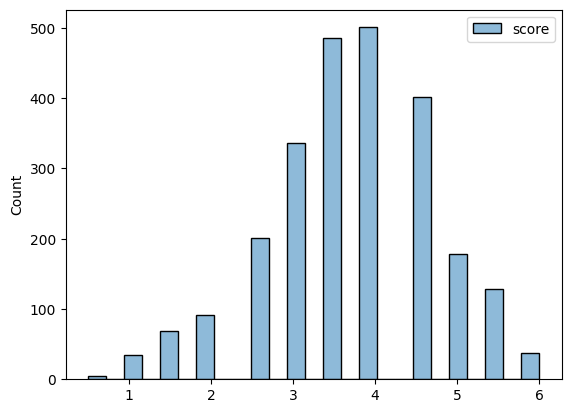

In [6]:
sns.histplot(testf)
display(testf.head())

In [107]:
summarization_df = trainf.groupby('id').agg(
    word_count=('word_count', 'max'),
    action_time_mean=('action_time', 'mean'),
    action_time_max=('action_time', 'max'),
    action_time_total=('action_time', 'sum'),
    action_time_50=('action_time', 'median'),
    event_count = ('event_id', lambda x: np.count_nonzero(x)),
    moves = ('move_activity', lambda x: np.count_nonzero(x)),
    paste_count=('activity', lambda x: np.count_nonzero(x == 'Paste')),
    nonproduction_count=('activity', lambda x: np.count_nonzero(x == 'Nonproduction')),
    input_count=('activity', lambda x: np.count_nonzero(x == 'Input')),
    remove_cut_count=('activity', lambda x: np.count_nonzero(x == 'Remove/Cut')),
    replace_count=('activity', lambda x: np.count_nonzero(x == 'Replace')),
    nochange_count=('text_change', lambda x: np.count_nonzero(x == 'NoChange')),
    capslock_count=('down_event', lambda x: np.count_nonzero(x == 'CapsLock')),
    paragraph_count=('down_event', lambda x: np.count_nonzero(x == 'Enter')),
    space_count=('down_event', lambda x: np.count_nonzero(x == 'Space')),
    question_count=('down_event', lambda x: np.count_nonzero(x == '?')),
    exclamation_count=('down_event', lambda x: np.count_nonzero(x == '!')),
    sub_texts_count=('down_event', lambda x: np.count_nonzero(x.isin(['(', '[', '{']))),
    
).reset_index()
summarization_df = pd.merge(summarization_df, back_track_data, on = 'id')
summarization_df = pd.merge(summarization_df, testf, on = 'id')
summarization_df.head()

,id,word_count,action_time_mean,action_time_max,action_time_total,action_time_50,event_count,moves,paste_count,nonproduction_count,...,space_count,question_count,exclamation_count,sub_texts_count,amount_back_track,mean_back_track,max_back_track,median_back_track,one_back_track,score
0,001519c8,256,116.246774,2259,297243,112.0,2557,3,0,120,...,357,0,0,0,454,10.557269,1350,1,419,3.5
1,0022f953,323,112.221271,1758,275391,115.0,2454,0,1,254,...,391,3,0,0,330,34.193939,1581,1,311,3.5
2,0042269b,404,101.837766,3005,421201,94.0,4136,0,0,175,...,552,0,0,0,482,27.506224,1862,1,438,6.0
3,0059420b,206,121.848329,806,189596,110.0,1556,0,1,99,...,243,0,0,0,159,4.622642,357,1,151,2.0
4,0075873a,252,123.943896,701,313702,129.0,2531,0,0,72,...,324,2,0,0,528,5.390152,643,1,518,4.0


C:\Users\Compumar\AppData\Local\Temp\ipykernel_27600\286986870.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


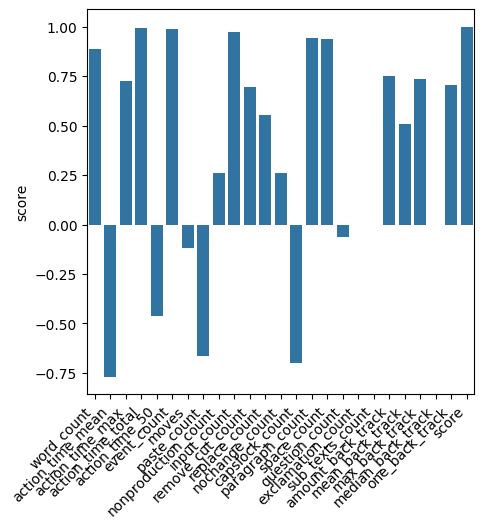

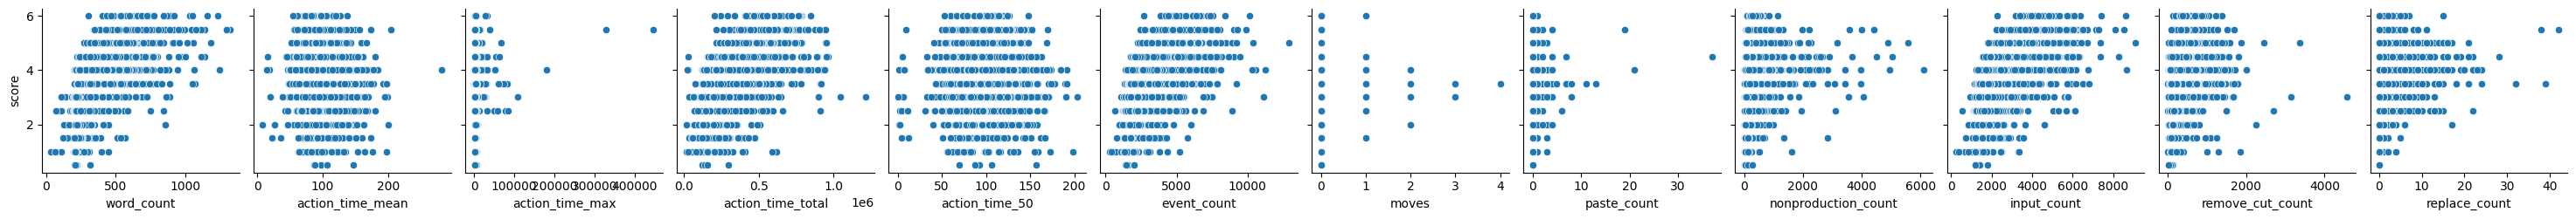

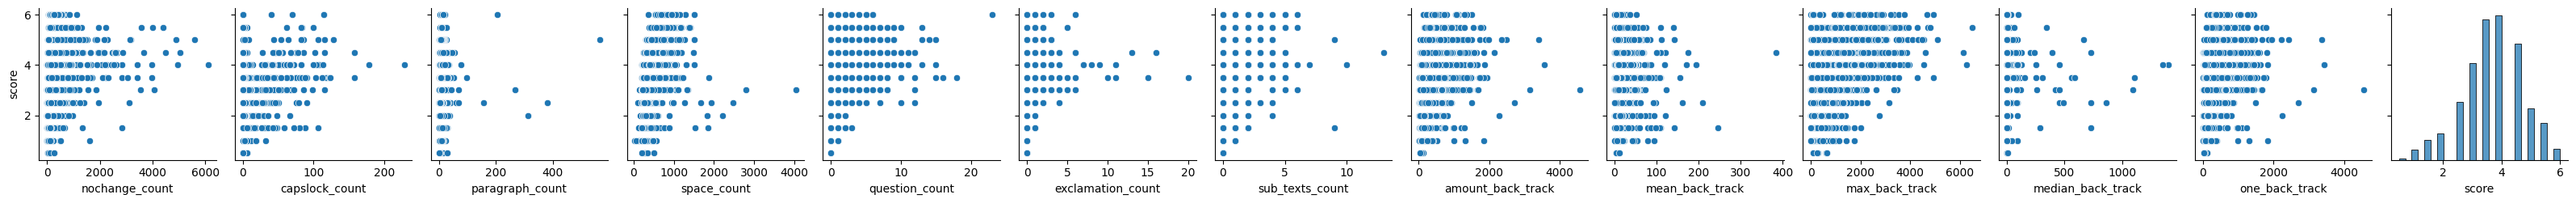

In [108]:
no_id_summarization_df = summarization_df.head().drop(['id'], axis=1)
corr = no_id_summarization_df.corr()
f, ax = plt.subplots(figsize=(5, 5))
chart = sns.barplot(corr['score'], ax=ax)
ax.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

sns.pairplot(summarization_df, y_vars=['score'], x_vars=no_id_summarization_df.columns[:len(no_id_summarization_df.columns)//2])
sns.pairplot(summarization_df, y_vars=['score'], x_vars=no_id_summarization_df.columns[len(no_id_summarization_df.columns)//2:])

In [109]:
print(summarization_df.columns)
summarization_df.to_csv('data/summarize.csv', index=False)

Index(['id', 'word_count', 'action_time_mean', 'action_time_max',
       'action_time_total', 'action_time_50', 'event_count', 'moves',
       'paste_count', 'nonproduction_count', 'input_count', 'remove_cut_count',
       'replace_count', 'nochange_count', 'capslock_count', 'paragraph_count',
       'space_count', 'question_count', 'exclamation_count', 'sub_texts_count',
       'amount_back_track', 'mean_back_track', 'max_back_track',
       'median_back_track', 'one_back_track', 'score'],
      dtype='object')
